In [57]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import os
import desimodel.io
%matplotlib inline

In [65]:
sim_path = "/project/projectdirs/desi/datachallenge/surveysim2018/weather/080"
exposures = Table.read(os.path.join(sim_path,'exposures.fits'), hdu=1)
tiles = desimodel.io.load_tiles()

In [66]:
(exposures['MJD'].max() - exposures['MJD'].min())/365

4.978253741753376

In [67]:
exposures['YEAR'] = np.int_((exposures['MJD']-exposures['MJD'].min())/365)

In [68]:
all_tiles_in_year = {}
for year in [0,1,2,3,4]:
    all_tiles_in_year[year] = list(set(exposures['TILEID'][exposures['YEAR']==year]))

In [69]:
dark_gray_tiles_in_year = {}
dark_gray_tiles = tiles[tiles['PROGRAM']!='BRIGHT']
for year in all_tiles_in_year.keys():
    ii = np.in1d(dark_gray_tiles['TILEID'], all_tiles_in_year[year])
    dark_tiles_in_year[year] = dark_gray_tiles['TILEID'][ii]

In [70]:
len(dark_tiles_in_year[4])

322

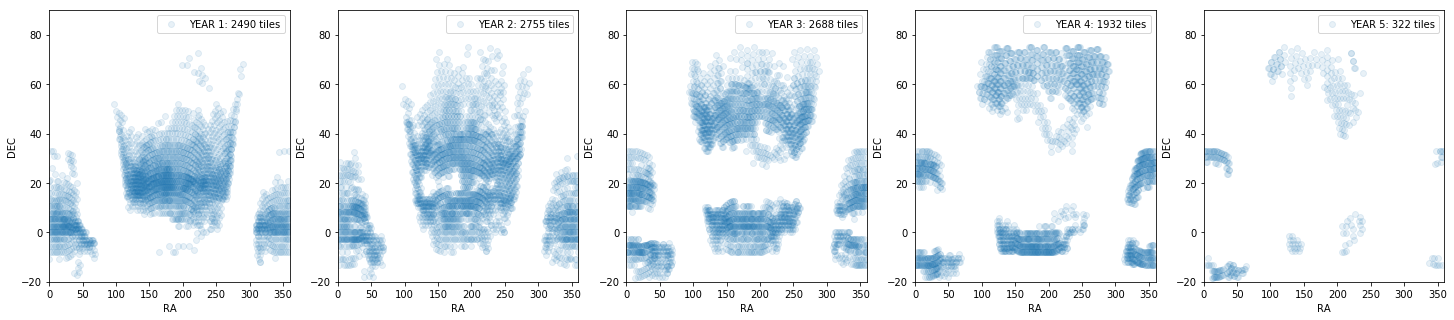

In [71]:
plt.figure(figsize=(25,5))
for year in all_tiles_in_year.keys():
    plt.subplot(1,5,year+1)
    ii = np.in1d(dark_gray_tiles['TILEID'], dark_tiles_in_year[year])
    plt.scatter(dark_gray_tiles['RA'][ii], dark_gray_tiles['DEC'][ii], alpha=0.1, label='YEAR {}: {} tiles'.format(year+1, np.count_nonzero(ii)))
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.ylim(-20,90)
    plt.xlim(0,360)
    plt.legend()